In [9]:
import pandas as pd    
import numpy as np
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt


In [21]:
df = pd.read_csv('SNL_18650_LFP_15C_0-100_0.5-1C_a_timeseries.csv')
df

,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
0,2018-02-01 10:02:10.002962,1.000200e+01,1.0,0.0,2.940,0.0,0.0,0.0,0.0,15.163,15.375
1,2018-02-01 10:02:20.016433,2.001600e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.148,15.437
2,2018-02-01 10:02:30.031429,3.003100e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375
3,2018-02-01 10:02:40.046426,4.004600e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.240,15.375
4,2018-02-01 10:02:50.061462,5.006100e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375
...,...,...,...,...,...,...,...,...,...,...,...
465880,2020-02-15 18:33:35.088926,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.319
465881,2020-02-15 18:33:36.108916,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.395
465882,2020-02-15 18:33:37.110896,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.395
465883,2020-02-15 18:33:38.130905,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.319


In [22]:
df = df.sample(frac = 0.02, random_state = 9)
df.describe()

,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
count,9.318000e+03,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,2.479789e+07,2272.497961,-0.009020,3.280428,0.702698,0.185067,2.354948,0.589182,14.811364,15.930761
std,1.431841e+07,1332.685527,0.723548,0.229439,0.332247,0.305075,1.130987,0.966732,0.409409,0.567080
min,2.001600e+01,1.000000,-1.101000,1.993000,0.000000,0.000000,0.000000,0.000000,13.807000,14.876000
25%,1.231704e+07,1105.250000,-1.099000,3.181000,0.421000,0.000000,1.384000,0.000000,14.559000,15.568250
50%,2.475903e+07,2249.500000,0.549000,3.352000,0.843000,0.000000,2.822500,0.000000,14.905000,15.808000
75%,3.760544e+07,3462.750000,0.549000,3.406000,0.985000,0.330000,3.308000,1.045000,15.029000,16.187000
max,4.891435e+07,4551.000000,0.550000,3.600000,2.069000,1.750000,7.045000,5.326000,28.790000,28.779000


In [23]:
df_train = df[["Current (A)", "Voltage (V)"]]
df_test = df[["Charge_Energy (Wh)", "Discharge_Energy (Wh)"]]

X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.10, random_state=0)

In [24]:
regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

MSE1 = mean_squared_error(y_test, y_pred)
print("Prediction accuracy MSE:", mean_squared_error(y_test, y_pred))

Prediction accuracy MSE: 0.07450884611909678


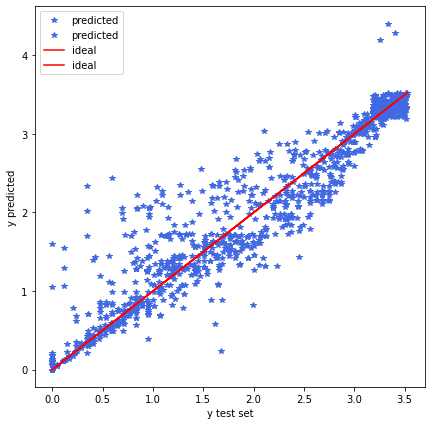

In [25]:
plt.figure(figsize=(7,7))
plt.plot(y_test, y_pred,'*', color='royalblue', label="predicted")
plt.plot(y_test, y_test,'-', color='red', label="ideal")
plt.xlabel('y test set')
plt.ylabel('y predicted')
plt.legend()
plt.show()